In [16]:
import csv

In [17]:
import pandas as pd


# Step 1: Read the CSV files
df2 = pd.read_csv('../Data/대한민국_범죄_총계_검거인원_성별(11~22).csv')
df1 = pd.read_csv('../Data/대한민국_범죄_총계_검거인원_성별(94~10).csv')
df1.drop(columns=['죄종별(1)'], inplace=True)
df2.drop(columns=['죄종별(1)'], inplace=True)

In [18]:
df1.columns=['연도','범죄 총 건수', '총검거인원', '남(검거수)', '여(검거수)']
df2.columns=['연도','범죄 총 건수', '총검거인원', '남(검거수)', '여(검거수)']

In [19]:
df1

,연도,범죄 총 건수,총검거인원,남(검거수),여(검거수)
0,1994,1309326,1423618,1240591,183027
1,1995,1329694,1450159,1250532,199627
2,1996,1419811,1551400,1325056,226344
3,1997,1536652,1672355,1440974,231381
4,1998,1712233,1862996,1574056,288940
5,1999,1654064,1926158,1612592,313566
6,2000,1739558,1897415,1606484,290931
7,2002,1833271,1942987,1631803,311184
8,2003,1894762,1917210,1596351,320859
9,2004,1968183,2267904,1867190,400714


## 연도별 범죄 총 건수 시각화

/tmp/ipykernel_23570/3986024258.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연도', y='범죄 총 건수', data=total_for_plot, palette='Set2')


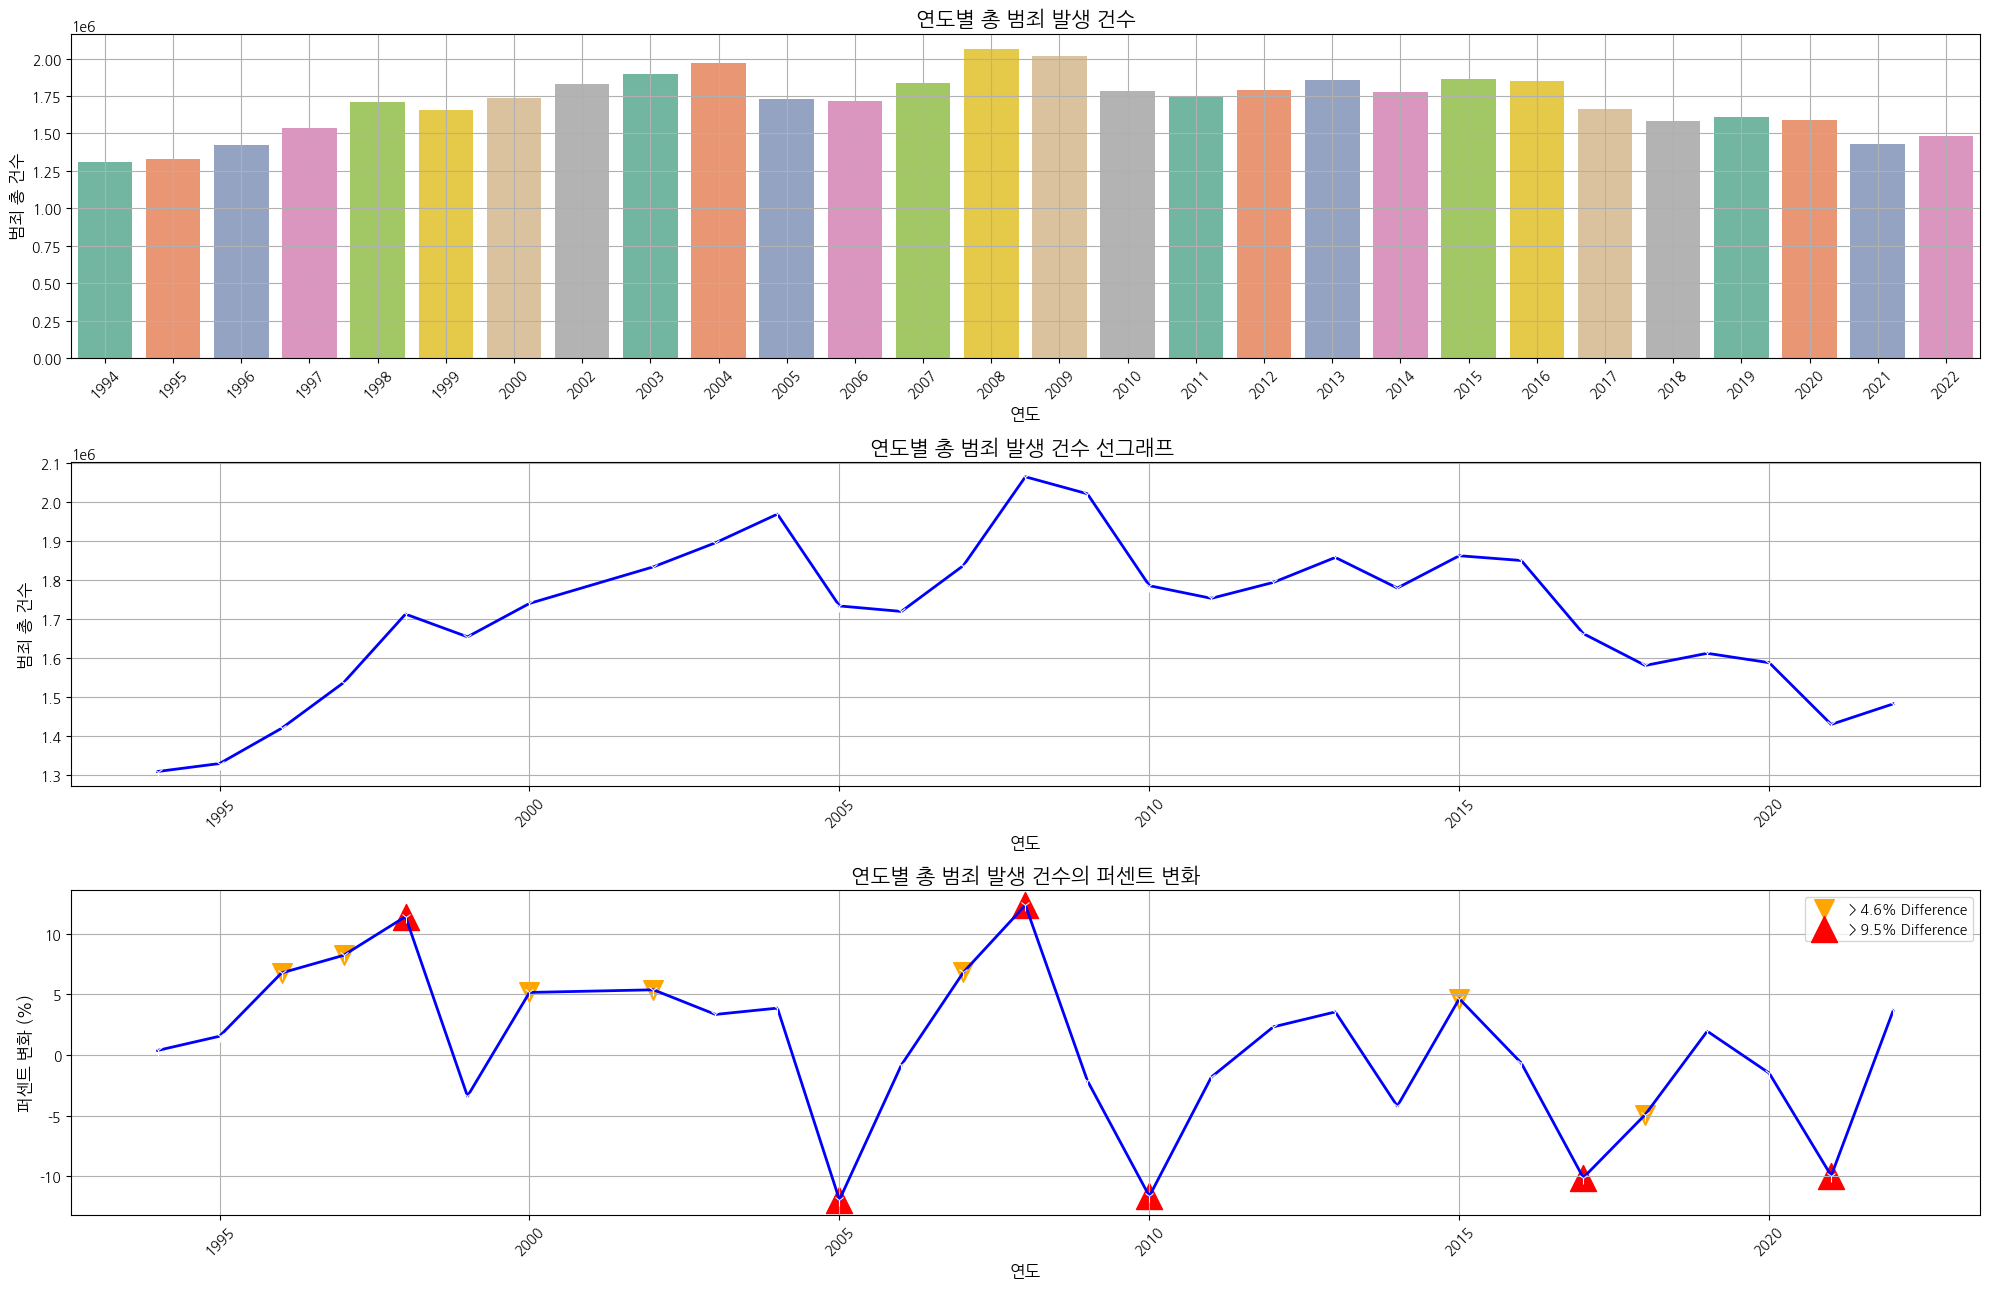

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib



#94년도 데이터 계산을 위한 93년 데이터 추가
total = pd.concat([df1, df2])
new_row = pd.DataFrame({'연도': ['1993'], '범죄 총 건수': [1304349]})
total = pd.concat([new_row, total]).reset_index(drop=True)

total['범죄 총 건수'] = pd.to_numeric(total['범죄 총 건수'], errors='coerce')

total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산


plt.figure(figsize=(20, 13))

total_for_plot = total[total['연도'] != '1993']

# 발생 건수 그래프
plt.subplot(3, 1, 1)
sns.lineplot(x='연도', y='범죄 총 건수', data=total_for_plot, marker='o', markersize=8, color='b', linewidth=2)
sns.barplot(x='연도', y='범죄 총 건수', data=total_for_plot, palette='Set2')
plt.title('연도별 총 범죄 발생 건수', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('범죄 총 건수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# 발생건수 선그래프
plt.subplot(3, 1, 2)
sns.lineplot(x='연도', y='범죄 총 건수', data=total_for_plot, marker='1', markersize=8, color='b', linewidth=2)
plt.title('연도별 총 범죄 발생 건수 선그래프 ', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('범죄 총 건수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # 그리드 표시


# 퍼센트 변화 그래프
plt.subplot(3, 1, 3)
sns.lineplot(x='연도', y='퍼센트변화', data=total_for_plot, marker='1', markersize=8, color='b', linewidth=2)
plt.title('연도별 총 범죄 발생 건수의 퍼센트 변화', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('퍼센트 변화 (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

threshold_5 = 4.6
threshold_10 = 9.5
diff_points_5 = total_for_plot[(total_for_plot['퍼센트변화'].abs() < threshold_10) & (total_for_plot['퍼센트변화'].abs() > threshold_5)]
plt.scatter(x=diff_points_5['연도'], y=diff_points_5['퍼센트변화'], color='orange', s=200, marker='v', label=f'> {threshold_5}% Difference')
diff_points_10 = total_for_plot[(total_for_plot['퍼센트변화'].abs() > threshold_10) & (total_for_plot['퍼센트변화'].abs() > threshold_5)]
plt.scatter(x=diff_points_10['연도'], y=diff_points_10['퍼센트변화'], color='red', s=350, marker='^', label=f'> {threshold_10}% Difference')

plt.legend()
plt.tight_layout()
plt.show();


In [45]:
total['차이']

0          NaN
1       4977.0
2      20368.0
3      90117.0
4     116841.0
5     175581.0
6     -58169.0
7      85494.0
8      93713.0
9      61491.0
10     73421.0
11   -235061.0
12    -14047.0
13    117421.0
14    227241.0
15    -43528.0
16   -235256.0
17    -32355.0
18     40802.0
19     63876.0
20    -78310.0
21     82691.0
22    -12207.0
23   -187109.0
24    -81590.0
25     31155.0
26    -24040.0
27   -158040.0
28     52607.0
Name: 차이, dtype: float64

In [46]:
total['퍼센트변화']

0           NaN
1      0.381570
2      1.555610
3      6.777274
4      8.229335
5     11.426205
6     -3.397260
7      5.168724
8      5.387173
9      3.354169
10     3.874946
11   -11.943046
12    -0.810503
13     6.830476
14    12.373618
15    -2.109183
16   -11.645132
17    -1.812653
18     2.328087
19     3.561726
20    -4.216390
21     4.648262
22    -0.655706
23   -10.117008
24    -4.908139
25     1.970899
26    -1.491402
27    -9.952981
28     3.679259
Name: 퍼센트변화, dtype: float64

1. 발생 건수 퍼센트 변화가 과연 유의미 한 값인가?

## 범죄 유형별 성장률 뽑아내기

In [21]:
import pandas as pd

cate_df2 = pd.read_csv('../Data/유형발생건수(11~22).csv')
cate_df1 = pd.read_csv('../Data/유형발생건수(94~10).csv')

In [22]:

cate_df1.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']
cate_df1.drop(cate_df1.index[:2], inplace=True)
cate_df1 = cate_df1.reset_index(drop=True)

In [23]:
cate_df2.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
cate_df2.drop(cate_df2.index[:1], inplace=True)
cate_df2 = cate_df2.reset_index(drop=True)

In [24]:
# 모든 값 정수형으로 변환
numeric_cols_df2 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
numeric_cols_df1 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']

cate_df2[numeric_cols_df2] = cate_df2[numeric_cols_df2].astype(int)
cate_df1[numeric_cols_df1] = cate_df1[numeric_cols_df1].astype(int)

In [ ]:
total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산

## 범죄 94~22년까지의 라인그래프 보여주기 모든 유형

In [40]:
alldata10 = cate_df1.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
alldata22 = cate_df2.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

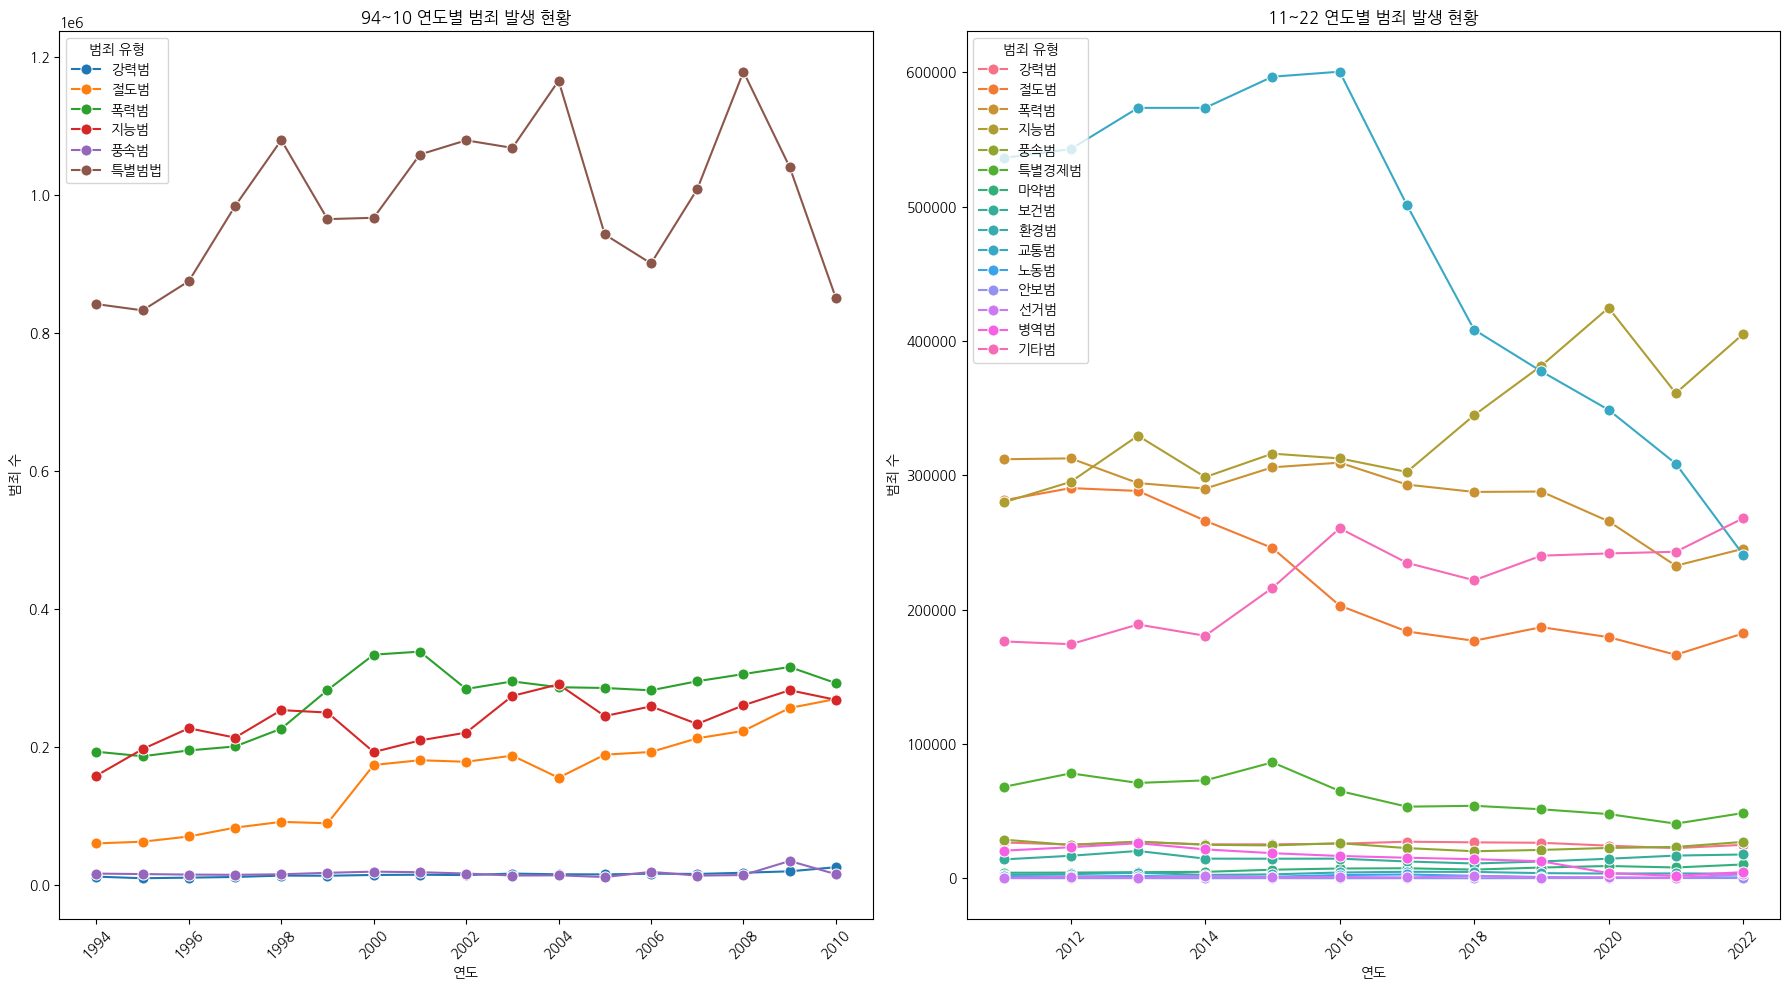

In [43]:
# 그래프 그리기
plt.figure(figsize=(18, 10))

# cate10 데이터프레임에 대한 lineplot
plt.subplot(1, 2, 1)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=alldata10, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')


# cate22 데이터프레임에 대한 lineplot
plt.subplot(1, 2, 2)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=alldata22, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')


plt.tight_layout()
plt.show()


## 겹치는 5개 데이터 값만 나타내기

In [27]:
# 5개 유형만 비교
cate10 = cate_df1.iloc[:, :6]
cate22 = cate_df2.iloc[:, :6]
total_cate = pd.concat([cate10, cate22], ignore_index=True)


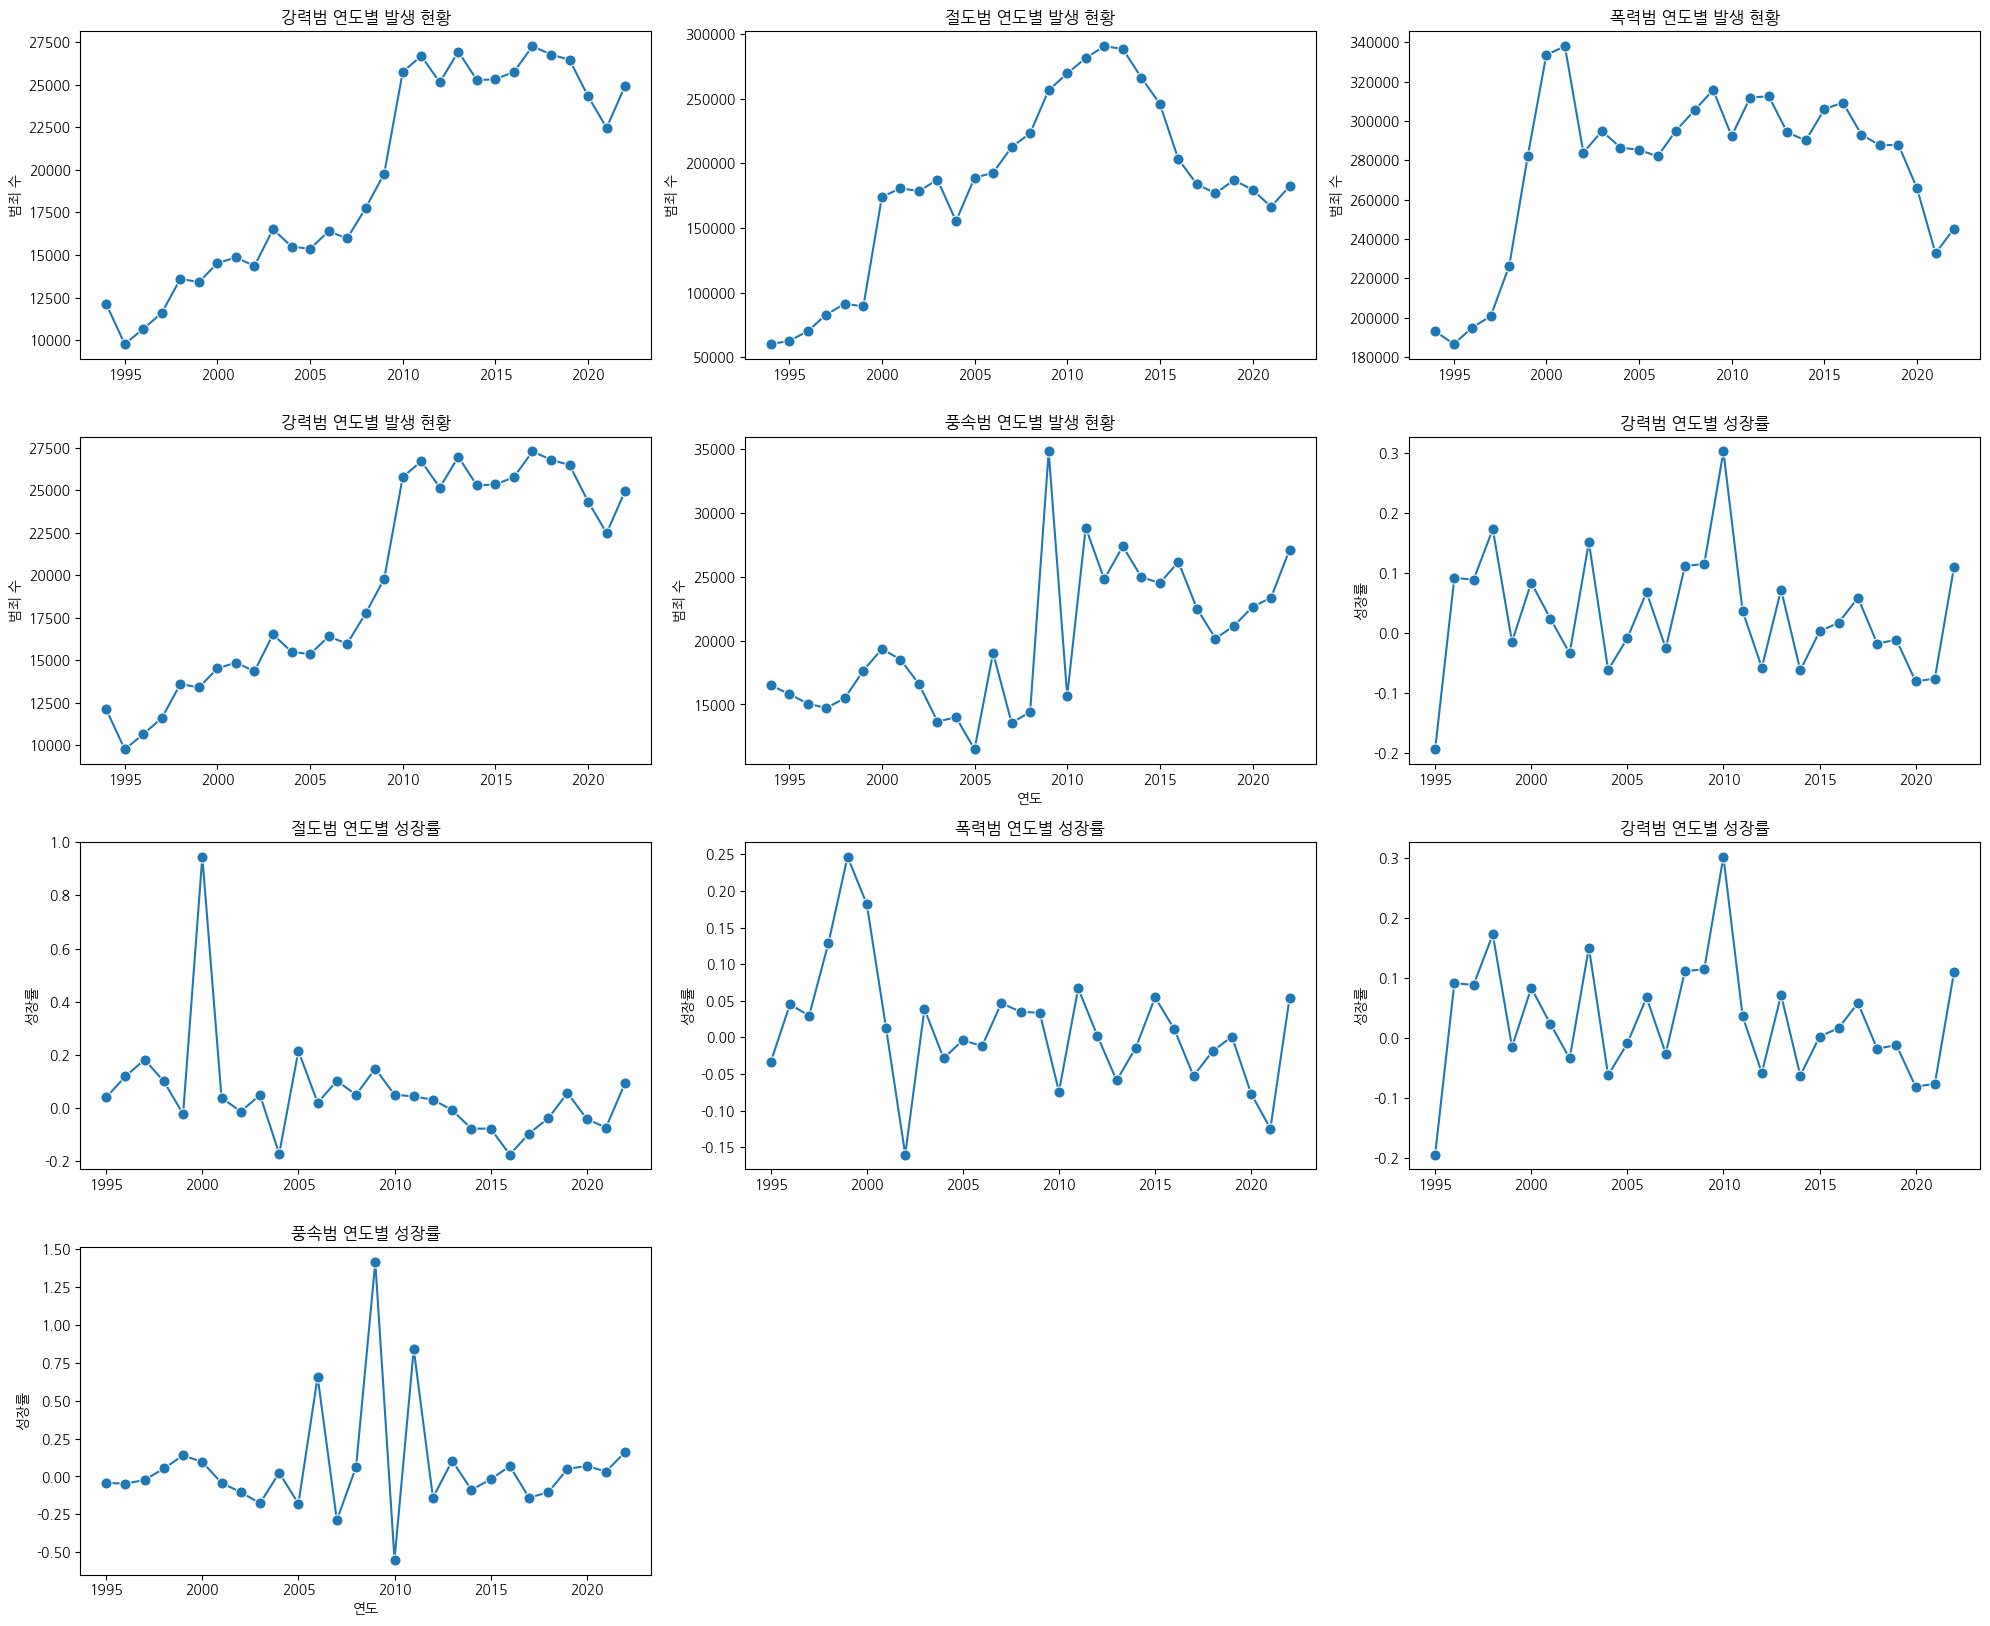

In [48]:
total_cate_growth = total_cate.set_index('연도').pct_change().reset_index()

# Plotting
plt.figure(figsize=(20, 20))

# Line plots for crime counts
plt.subplot(5, 3, 1)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

plt.subplot(5, 3, 2)
sns.lineplot(x='연도', y='절도범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황')

plt.subplot(5, 3, 3)
sns.lineplot(x='연도', y='폭력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황')

plt.subplot(5, 3, 4)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

plt.subplot(5, 3, 5)
sns.lineplot(x='연도', y='풍속범', data=total_cate, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('풍속범 연도별 발생 현황')

# Growth rate plots
plt.subplot(5, 3, 6)
sns.lineplot(x='연도', y='강력범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('성장률')
plt.title('강력범 연도별 성장률')

plt.subplot(5, 3, 7)
sns.lineplot(x='연도', y='절도범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('성장률')
plt.title('절도범 연도별 성장률')

plt.subplot(5, 3, 8)
sns.lineplot(x='연도', y='폭력범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('성장률')
plt.title('폭력범 연도별 성장률')

plt.subplot(5, 3, 9)
sns.lineplot(x='연도', y='강력범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('성장률')
plt.title('강력범 연도별 성장률')

plt.subplot(5, 3, 10)
sns.lineplot(x='연도', y='풍속범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('성장률')
plt.title('풍속범 연도별 성장률')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [28]:
total_cate

,연도,강력범,절도범,폭력범,지능범,풍속범
0,1994,12114,60255,193047,158399,16515
1,1995,9762,62710,186490,196845,15815
2,1996,10655,70238,194891,227064,15070
3,1997,11599,83063,200675,213445,14722
4,1998,13602,91438,226409,253297,15497
5,1999,13400,89395,282274,249769,17655
6,2000,14520,173876,333630,192574,19342
7,2001,14858,180704,338045,209364,18519
8,2002,14353,178457,283930,220719,16605
9,2003,16519,187352,294893,273867,13668


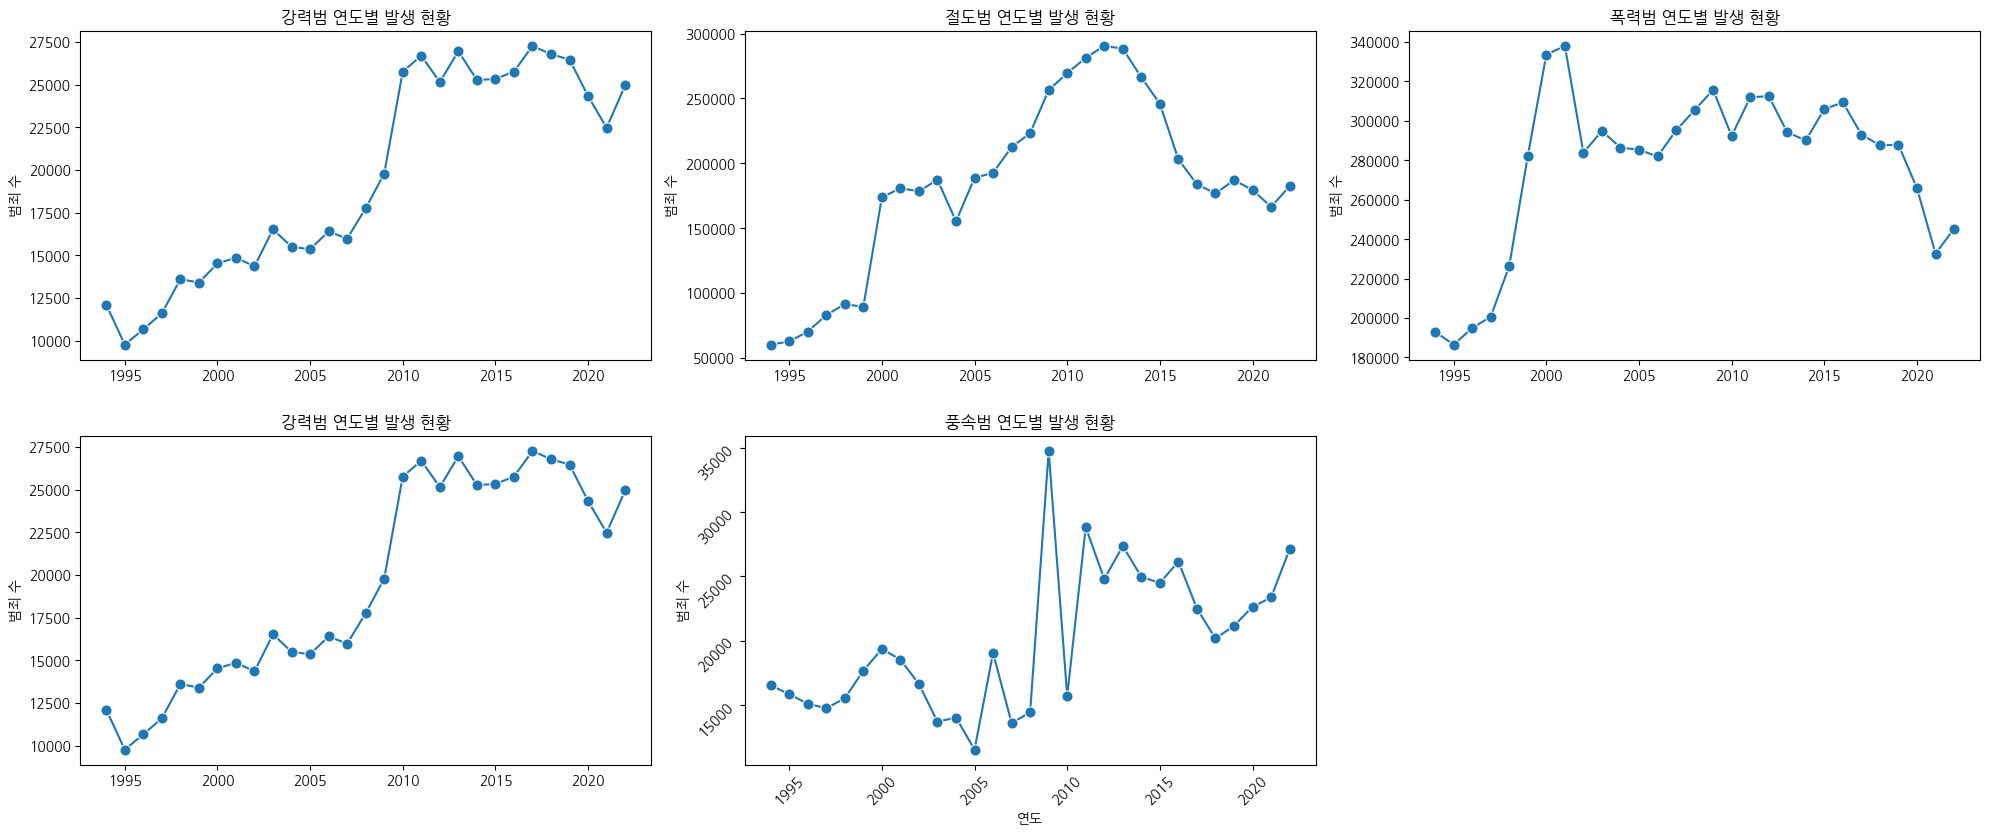

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# subplot 1
plt.subplot(5, 3, 1)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

# subplot 2
plt.subplot(5, 3, 2)
sns.lineplot(x='연도', y='절도범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황')

# subplot 3
plt.subplot(5, 3, 3)
sns.lineplot(x='연도', y='폭력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황')

# subplot 4
plt.subplot(5, 3, 4)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

# subplot 5
plt.subplot(5, 3, 5)
sns.lineplot(x='연도', y='풍속범', data=total_cate, marker='o', markersize=8)
plt.xlabel('연도')  # x축 라벨 추가
plt.ylabel('범죄 수')
plt.title('풍속범 연도별 발생 현황')

# 축 라벨 회전
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


In [50]:
cate10

,연도,강력범,절도범,폭력범,지능범,풍속범
0,1994,12114,60255,193047,158399,16515
1,1995,9762,62710,186490,196845,15815
2,1996,10655,70238,194891,227064,15070
3,1997,11599,83063,200675,213445,14722
4,1998,13602,91438,226409,253297,15497
5,1999,13400,89395,282274,249769,17655
6,2000,14520,173876,333630,192574,19342
7,2001,14858,180704,338045,209364,18519
8,2002,14353,178457,283930,220719,16605
9,2003,16519,187352,294893,273867,13668


In [31]:
crime_data_df1 = cate10.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
crime_data_df2 = cate22.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

In [32]:
crime_data_df1

,연도,범죄 유형,범죄 수
0,1994,강력범,12114
1,1995,강력범,9762
2,1996,강력범,10655
3,1997,강력범,11599
4,1998,강력범,13602
...,...,...,...
80,2006,풍속범,19040
81,2007,풍속범,13563
82,2008,풍속범,14411
83,2009,풍속범,34793


## 종합적인 그래프 보여주기

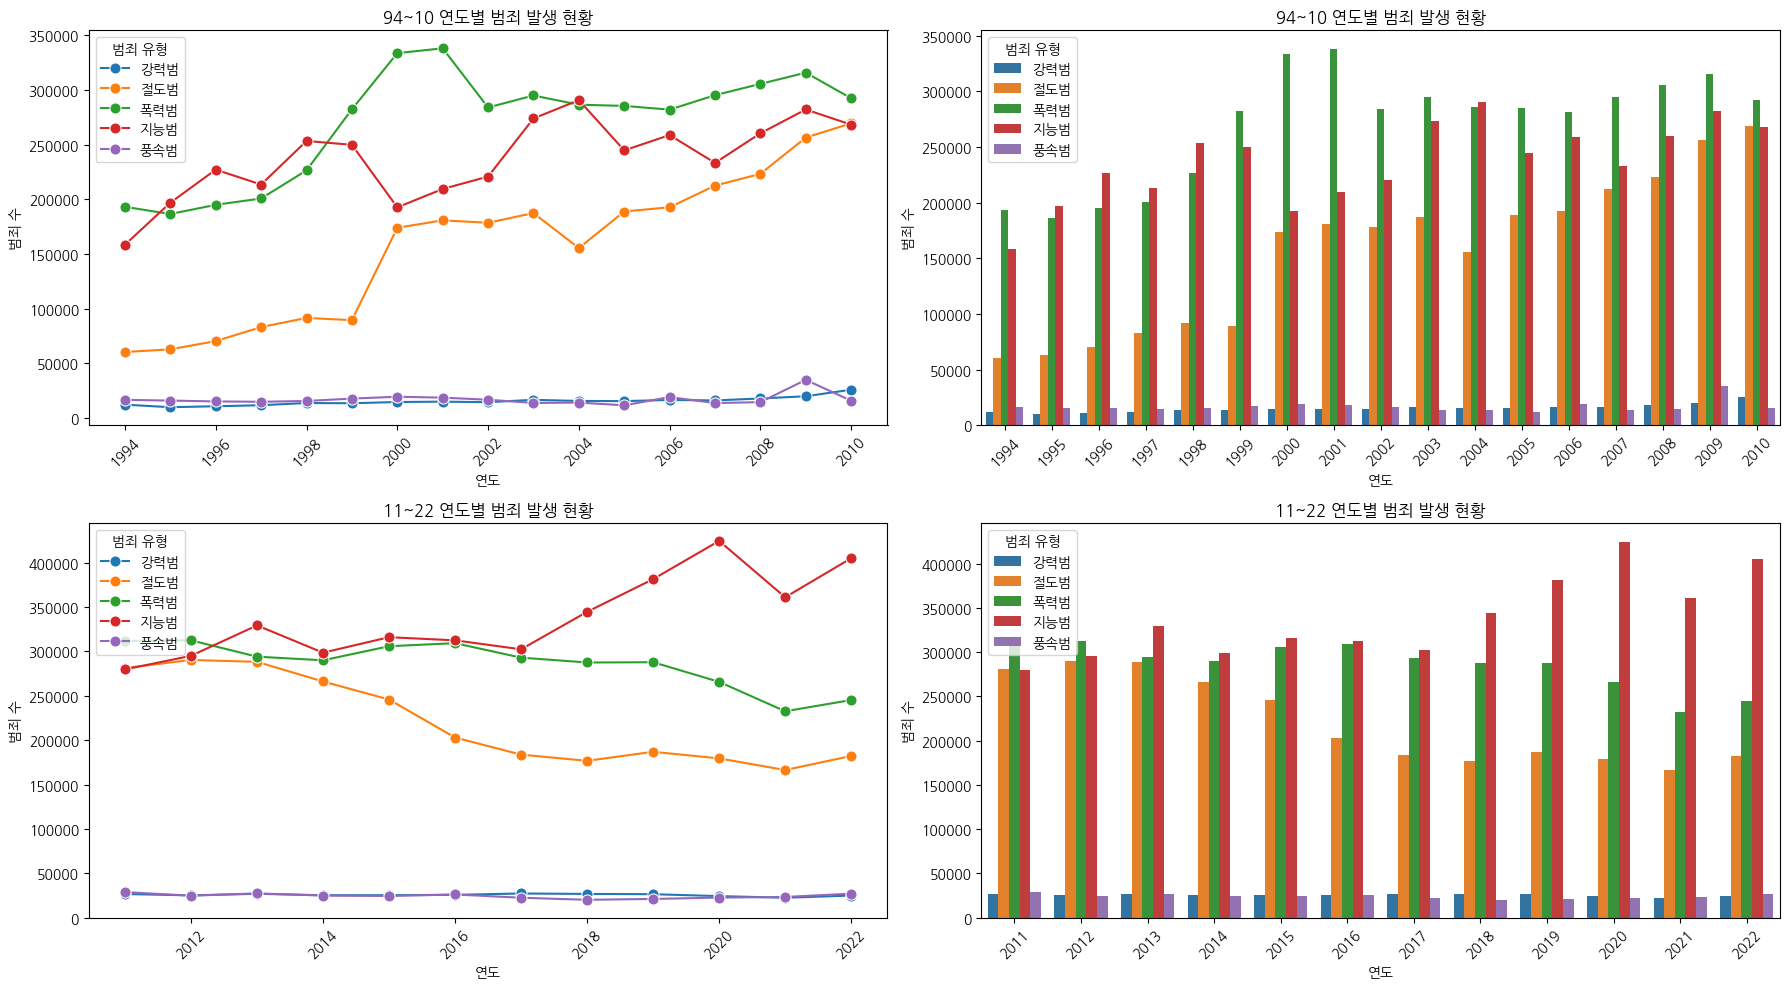

In [38]:
# 그래프 그리기
plt.figure(figsize=(18, 10))

# cate10 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 1)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate10 데이터프레임에 대한 barplot
plt.subplot(2, 2, 2)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')


# cate22 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 3)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate22 데이터프레임에 대한 barplot
plt.subplot(2, 2, 4)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

plt.tight_layout()
plt.show()


### 라인그래프 합쳐서 보여주기

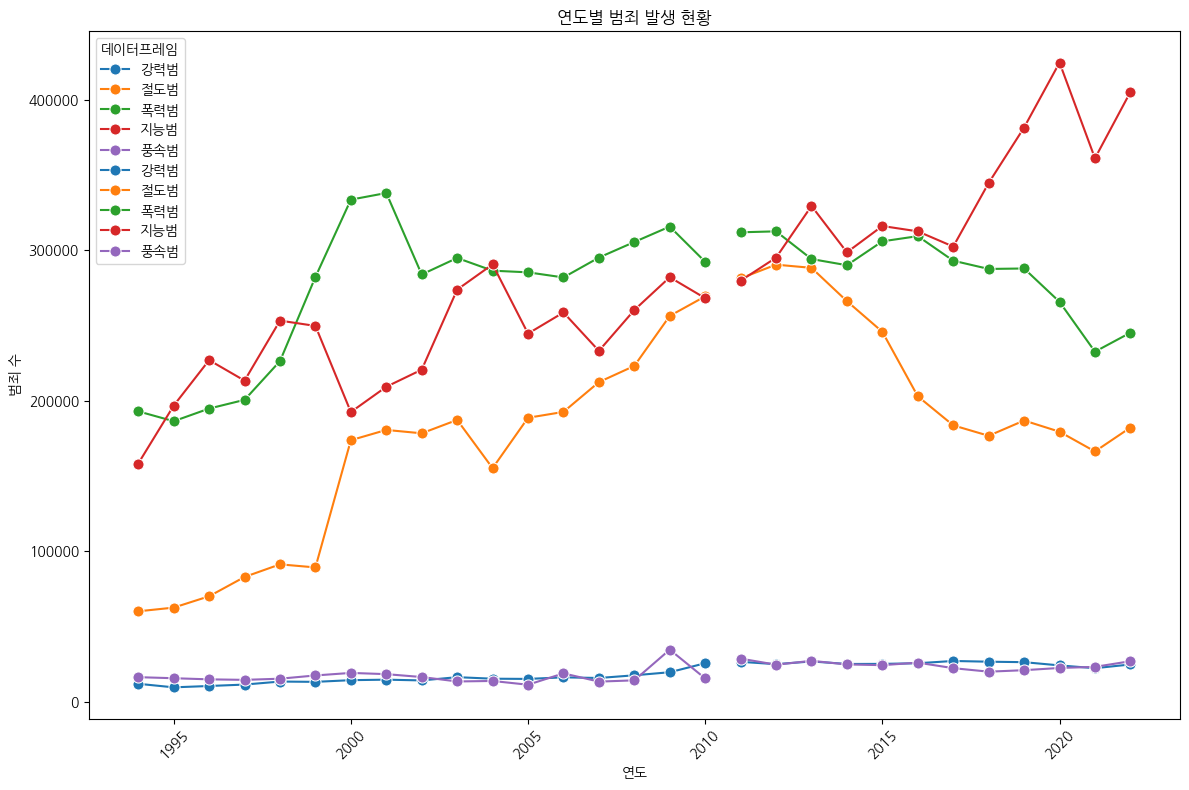

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# cate10 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)

# cate22 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)

plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='데이터프레임', loc='upper left')

plt.tight_layout()
plt.show();

## 유형별 성장률 데이터 보여주기